In [7]:
# Author: Viha Hibare
# A-2 Batch
# Roll Number 27

In [8]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)

{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical features
X_processed = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Select 'G3' as the target for classification
y_g3 = y['G3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_g3, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42, max_depth=3) # Limiting depth for minimalistic plot
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

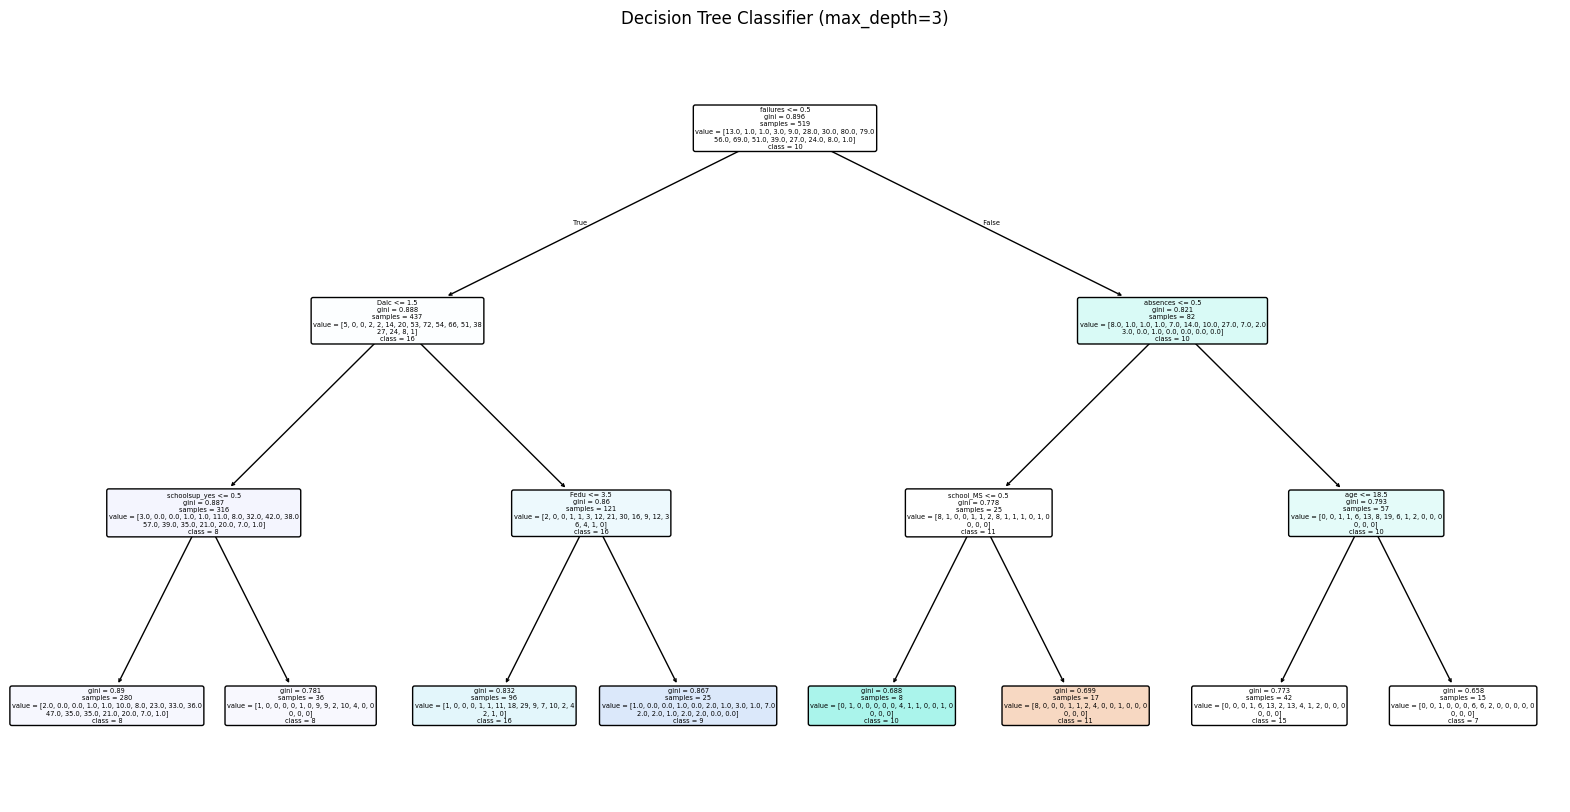

In [10]:
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=X_processed.columns.tolist(), class_names=[str(c) for c in y_g3.unique()], rounded=True)
plt.title("Decision Tree Classifier (max_depth=3)")
plt.show()